In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Necessary Dependencies
import numpy as np
import pandas as pd
!pip install utils
from utils import *
from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf
# DenseNet Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc
print('Started')

2025-12-09 23:13:15.194909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765321995.380099      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765321995.432549      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=e4016d5ba7399e92121f7b3a7ee6932f0d1ac804a24f61f97dd8f962d7eaf4b3
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils
Started


# Spliting The Data

In [2]:
import os 
import shutil # To copy files
import random # To shuffle list


In [3]:
input_dir = "/kaggle/input/eye-dataset/Eye dataset"
output_dir = "/kaggle/working/data_split"

In [4]:
os.listdir(input_dir)

['forward_look', 'close_look', 'right_look', 'left_look']

In [5]:


# ======== CONFIG ========

train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1
RANDOM_SEED = 42  # set seed for reproducible splits
# ========================

# Optional: sanity check that ratios sum to 1.0 (or close)
total = train_ratio + val_ratio + test_ratio
if abs(total - 1.0) > 1e-6:
    raise ValueError(f"train/val/test ratios must sum to 1.0 — got {total}")

# Set random seed for reproducibility
random.seed(RANDOM_SEED)

# Create the train/val/test subfolders and class subfolders under output_dir.
# We iterate classes found in input_dir and ensure the same class names exist for each split.
for split in ["train", "val", "test"]:
    for cls in os.listdir(input_dir):
        cls_input_path = os.path.join(input_dir, cls)
        # Skip any non-directory entries in the input folder (e.g., files)
        if not os.path.isdir(cls_input_path):
            continue
        # Make corresponding class folder in the output split folder
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Now loop over each class folder and split its images
for cls in os.listdir(input_dir):
    cls_path = os.path.join(input_dir, cls)

    # Skip entries that are not directories (in case there are stray files)
    if not os.path.isdir(cls_path):
        continue

    # List all files in the class folder
    images = os.listdir(cls_path)

    # Optional: filter out hidden or non-image files. Uncomment and adapt extensions if needed.
    # allowed_ext = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'}
    # images = [f for f in images if os.path.splitext(f)[1].lower() in allowed_ext]

    # Shuffle the file list in-place (random.seed was set earlier so shuffle is reproducible)
    random.shuffle(images)

    # Compute slice indices for train/val/test according to ratios
    train_end = int(len(images) * train_ratio)
    val_end = train_end + int(len(images) * val_ratio)

    # Slice the filenames into three lists
    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    # Copy files to the output folders. Use copy2 to preserve metadata; copy is fine too.
    for img in train_imgs:
        src = os.path.join(cls_path, img)
        dst = os.path.join(output_dir, "train", cls, img)
        # skip if source is not a file (safety)
        if os.path.isfile(src):
            shutil.copy2(src, dst)

    for img in val_imgs:
        src = os.path.join(cls_path, img)
        dst = os.path.join(output_dir, "val", cls, img)
        if os.path.isfile(src):
            shutil.copy2(src, dst)

    for img in test_imgs:
        src = os.path.join(cls_path, img)
        dst = os.path.join(output_dir, "test", cls, img)
        if os.path.isfile(src):
            shutil.copy2(src, dst)

print("✔️ Done! Dataset successfully split into train / val / test folders.")


✔️ Done! Dataset successfully split into train / val / test folders.


Ensure the number of images in each folder after spliting 

In [6]:
base_dir = "/kaggle/working/data_split"
splits = ["test","train", "val"]
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"---{split.upper()}---")

    for cls in os.listdir(split_dir):
        cls_dir = os.path.join(split_dir, cls)
        if os.path.isdir(cls_dir):
            num_images = len(os.listdir(cls_dir))
            print(f"{cls}: {num_images} images")
            total_images += num_images

    print(f"Total {split} images: {total_images}\n")

---TEST---
left_look: 351 images
forward_look: 347 images
right_look: 359 images
close_look: 384 images
Total test images: 1441

---TRAIN---
left_look: 2448 images
forward_look: 2419 images
right_look: 2503 images
close_look: 2679 images
Total train images: 10049

---VAL---
left_look: 699 images
forward_look: 691 images
right_look: 715 images
close_look: 765 images
Total val images: 2870



In [7]:
train_dir = "/kaggle/working/data_split/train"
val_dir = "/kaggle/working/data_split/val"
test_dir = "/kaggle/working/data_split/test"


In [8]:
import tensorflow as tf
img_size = (224,224)
batch_size = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size= img_size,
    batch_size = batch_size,
    label_mode="categorical", # To one-hot encoding the lebels of each class
    # for example 0 >> represented as [1,0,0,0]
    # //   //     1 >> represented as [0,1,0,0]
    color_mode="rgb",
    shuffle= True,
    verbose= 1,
    
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="rgb",
    shuffle= False,
    verbose=1
)
    
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="rgb",
    shuffle= False,
    verbose=1
)

Found 10049 files belonging to 4 classes.


I0000 00:00:1765322080.304553      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 2870 files belonging to 4 classes.
Found 1441 files belonging to 4 classes.


In [9]:
import numpy as np
y_true = np.concatenate([y for x,y in test_ds],axis=0)
# Iterate over each Batch of the images and return an array of the labels of the images

In [10]:
y_true.shape

(1441, 4)

# Data Augmentation

Visualize Some Images before augmentation

Found 14360 images belonging to 4 classes.


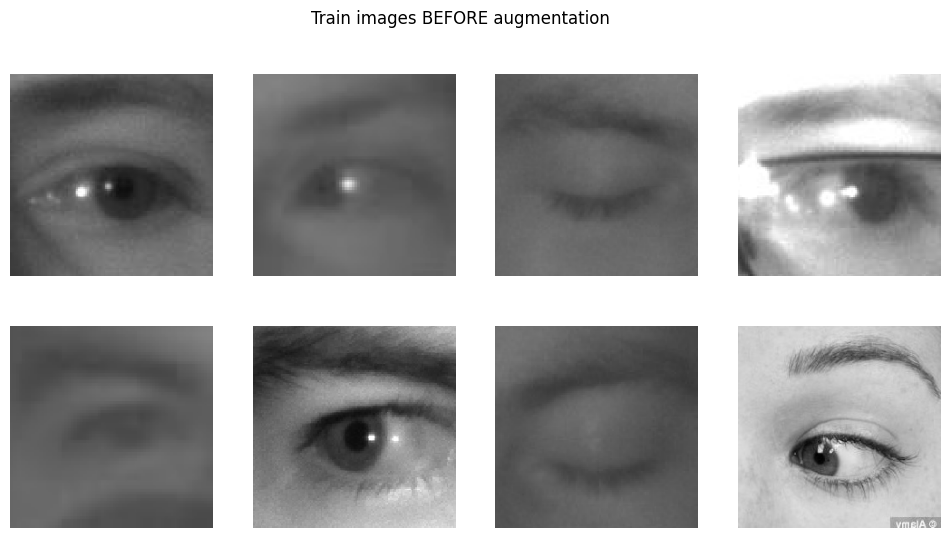

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Simple ImageDataGenerator for visualization (no augmentation)
visual_datagen = ImageDataGenerator(rescale=1./255)
visual_generator = visual_datagen.flow_from_directory(
    input_dir,
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

# Get one batch of images
images, labels = next(visual_generator)

# Plot images
plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle("Train images BEFORE augmentation")
plt.show()

# Data Equalization

In [12]:
# def equalize(img):
#   img = img.astype("uint8")
#   clahe = cv2.createCLAHE(tileGridSize=(8,8))
#   img = clahe.apply(img)
#   img = np.expand_dims(img, 2)  # This uses NumPy to add a new axis to the image img at position 2.(height, width, 1),
#   # Because the NN in The CNN expect the size of (H, W, channel)

#   img = np.repeat(img,3,axis=2)
#   img = img.astype("float32") # Convert the int8 to float 32 because in the ImageDataGen it can't scale the data that have type int8
#    return img

In [13]:
# AUTOTUNE = tf.data.AUTOTUNE
# batch_size = 16

# def preprocess_image(image, label):
#     # Apply equalization using py_function
#     image = tf.py_function(func=equalize, inp=[image], Tout=tf.float32)
#     image.set_shape([224, 224, 3])  # Make sure shape is fully defined
#     image = image / 255.0
#     return image, label

# # Map and batch
# train_ds = train_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
# train_ds = train_ds.batch(batch_size)  # <-- this restores the batch dimension
# train_ds = train_ds.prefetch(AUTOTUNE)

# val_ds = val_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
# val_ds = val_ds.batch(batch_size)
# val_ds = val_ds.prefetch(AUTOTUNE)

# # For test dataset, if labels are one-hot already from image_dataset_from_directory
# test_ds = test_ds.map(lambda x, y: (x / 255.0, tf.cast(y, tf.float32)), num_parallel_calls=AUTOTUNE)
# test_ds = test_ds.batch(batch_size).prefetch(AUTOTUNE)


# Data Augmentation

In [14]:
data_augmentation= tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.15),
    layers.RandomBrightness(factor=0.2)
])

In [15]:
# prefetch used to load the next batch in the memory while the model is training 
# That will reduce the time of training
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)
# The buffer_size is the number of batches will be loaded in the memory in each iteration



# Callbacks

In [16]:
def get_callbacks(model_name):
    callbacks = []
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5', verbose=1, monitor='val_accuracy',mode='max',save_best_only=True)
    callbacks.append(checkpoint)
    rl = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=0.0000001,min_delta=0.00001,mode='auto')
    callbacks.append(rl)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode="max")
    callbacks.append(earlystop)

    return callbacks

# Dense Net Model

In [17]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(
    learning_rate=0.0005,  # slightly lower than default for stable training
    beta_1=0.9,            # default, usually leave as is
    beta_2=0.999,          # default, usually leave as is
    epsilon=1e-08,         # slightly lower than default, good for numerical stability
    amsgrad=False   )        # optional, True can help in some cases

In [18]:
base_model = tf.keras.applications.DenseNet121(
    input_shape=(224,224,3),
    include_top = False,
    weights= "imagenet"
                                              )
base_model.trainable = True
inputs = tf.keras.Input(shape=(224,224,3))
# Apply Data Augmentation on the input data
x = data_augmentation(inputs)
x = base_model.output # Get the last layer of the model not the classifier output
x = GlobalAveragePooling2D()(x) # Flatten 
predictions = Dense(4, activation="softmax", name="Final")(x)
model = Model(inputs=base_model.input,outputs=predictions)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 6,957,956 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [20]:
optimizer = Adam(
    learning_rate=0.0005,  # slightly lower than default for stable training
    beta_1=0.9,            # default, usually leave as is
    beta_2=0.999,          # default, usually leave as is
    epsilon=1e-08,         # slightly lower than default, good for numerical stability
    amsgrad=False           # optional, True can help in some cases
)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy",
                       keras.metrics.Recall(name="recall"),
                       keras.metrics.Precision(name="precision"),
                       keras.metrics.F1Score(average='macro', name='f1_score') # Using F1Score from tf.keras.metrics
                      ])

In [21]:
callbacks= get_callbacks("densenet121")

history = model.fit(train_ds,
                   epochs=20,
                   validation_data=val_ds,
                   callbacks=[callbacks],
                   verbose=1)

Epoch 1/20


I0000 00:00:1765322144.802402     125 service.cc:148] XLA service 0x7d7b2c002eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765322144.803159     125 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1765322153.487014     125 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/629 ━━━━━━━━━━━━━━━━━━━━ 23:45:05 136s/step - accuracy: 0.2500 - f1_score: 0.1000 - loss: 2.1365 - precision: 0.2143 - recall: 0.1875

I0000 00:00:1765322224.040347     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


629/629 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8904 - f1_score: 0.8891 - loss: 0.3198 - precision: 0.9037 - recall: 0.8770
Epoch 1: val_accuracy improved from -inf to 0.95331, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 289s 244ms/step - accuracy: 0.8905 - f1_score: 0.8892 - loss: 0.3196 - precision: 0.9037 - recall: 0.8771 - val_accuracy: 0.9533 - val_f1_score: 0.9529 - val_loss: 0.1387 - val_precision: 0.9543 - val_recall: 0.9530 - learning_rate: 5.0000e-04
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9666 - f1_score: 0.9662 - loss: 0.1086 - precision: 0.9694 - recall: 0.9630
Epoch 2: val_accuracy improved from 0.95331 to 0.97456, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.9666 - f1_score: 0.9662 - loss: 0.1086 - precision: 0.9694 - recall: 0.9630 - val_accuracy: 0.9746 - val_f1_score: 0.9742 - val_loss: 0.0763 - val_precision: 0.9768 - val_recall: 0.9700 - learning_rate: 5.0000e-04
Epoch 3/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9756 - f1_score: 0.9753 - loss: 0.0759 - precision: 0.9768 - recall: 0.9746
Epoch 3: val_accuracy did not improve from 0.97456
629/629 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.9756 - f1_score: 0.9753 - loss: 0.0759 - precision: 0.9768 - recall: 0.9746 - val_accuracy: 0.9317 - val_f1_score: 0.9318 - val_loss: 0.1912 - val_precision: 0.9320 - val_recall: 0.9317 - learning_rate: 5.0000e-04
Epoch 4/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9762 - f1_score: 0.9760 - loss: 0.0764 - precision: 0.9781 - recall: 0.9751
Epoch 4: val_accuracy improved from 0.97456 to 0.97491, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.9762 - f1_score: 0.9760 - loss: 0.0764 - precision: 0.9781 - recall: 0.9751 - val_accuracy: 0.9749 - val_f1_score: 0.9745 - val_loss: 0.0904 - val_precision: 0.9749 - val_recall: 0.9746 - learning_rate: 5.0000e-04
Epoch 5/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9829 - f1_score: 0.9828 - loss: 0.0542 - precision: 0.9845 - recall: 0.9823
Epoch 5: val_accuracy improved from 0.97491 to 0.97909, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.9829 - f1_score: 0.9828 - loss: 0.0542 - precision: 0.9845 - recall: 0.9823 - val_accuracy: 0.9791 - val_f1_score: 0.9787 - val_loss: 0.0624 - val_precision: 0.9801 - val_recall: 0.9787 - learning_rate: 5.0000e-04
Epoch 6/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9840 - f1_score: 0.9838 - loss: 0.0480 - precision: 0.9850 - recall: 0.9823
Epoch 6: val_accuracy improved from 0.97909 to 0.98014, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.9840 - f1_score: 0.9838 - loss: 0.0480 - precision: 0.9850 - recall: 0.9823 - val_accuracy: 0.9801 - val_f1_score: 0.9798 - val_loss: 0.0697 - val_precision: 0.9805 - val_recall: 0.9801 - learning_rate: 5.0000e-04
Epoch 7/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9781 - f1_score: 0.9779 - loss: 0.0621 - precision: 0.9802 - recall: 0.9773
Epoch 7: val_accuracy improved from 0.98014 to 0.98084, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.9781 - f1_score: 0.9779 - loss: 0.0621 - precision: 0.9802 - recall: 0.9773 - val_accuracy: 0.9808 - val_f1_score: 0.9805 - val_loss: 0.0742 - val_precision: 0.9832 - val_recall: 0.9794 - learning_rate: 5.0000e-04
Epoch 8/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9872 - f1_score: 0.9871 - loss: 0.0422 - precision: 0.9885 - recall: 0.9868
Epoch 8: val_accuracy improved from 0.98084 to 0.98467, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 109ms/step - accuracy: 0.9872 - f1_score: 0.9871 - loss: 0.0422 - precision: 0.9885 - recall: 0.9868 - val_accuracy: 0.9847 - val_f1_score: 0.9844 - val_loss: 0.0476 - val_precision: 0.9854 - val_recall: 0.9843 - learning_rate: 5.0000e-04
Epoch 9/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9740 - f1_score: 0.9738 - loss: 0.0780 - precision: 0.9763 - recall: 0.9728
Epoch 9: val_accuracy did not improve from 0.98467
629/629 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.9741 - f1_score: 0.9738 - loss: 0.0779 - precision: 0.9763 - recall: 0.9728 - val_accuracy: 0.9805 - val_f1_score: 0.9801 - val_loss: 0.0582 - val_precision: 0.9815 - val_recall: 0.9801 - learning_rate: 5.0000e-04
Epoch 10/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9881 - f1_score: 0.9880 - loss: 0.0371 - precision: 0.9890 - recall: 0.9872
Epoch 10: val_accuracy did not improve from 0.98467
629/629 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.9881 -

629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 109ms/step - accuracy: 0.9806 - f1_score: 0.9804 - loss: 0.0592 - precision: 0.9817 - recall: 0.9790 - val_accuracy: 0.9875 - val_f1_score: 0.9872 - val_loss: 0.0526 - val_precision: 0.9881 - val_recall: 0.9868 - learning_rate: 5.0000e-04
Epoch 12/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9912 - f1_score: 0.9911 - loss: 0.0284 - precision: 0.9916 - recall: 0.9912
Epoch 12: val_accuracy did not improve from 0.98746
629/629 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.9912 - f1_score: 0.9911 - loss: 0.0284 - precision: 0.9916 - recall: 0.9912 - val_accuracy: 0.9829 - val_f1_score: 0.9825 - val_loss: 0.0622 - val_precision: 0.9839 - val_recall: 0.9826 - learning_rate: 5.0000e-04
Epoch 13/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9898 - f1_score: 0.9897 - loss: 0.0320 - precision: 0.9907 - recall: 0.9892
Epoch 13: val_accuracy improved from 0.98746 to 0.98815, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 109ms/step - accuracy: 0.9898 - f1_score: 0.9897 - loss: 0.0319 - precision: 0.9907 - recall: 0.9892 - val_accuracy: 0.9882 - val_f1_score: 0.9880 - val_loss: 0.0427 - val_precision: 0.9885 - val_recall: 0.9882 - learning_rate: 5.0000e-04
Epoch 14/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9892 - f1_score: 0.9891 - loss: 0.0308 - precision: 0.9894 - recall: 0.9890
Epoch 14: val_accuracy did not improve from 0.98815
629/629 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.9892 - f1_score: 0.9891 - loss: 0.0309 - precision: 0.9894 - recall: 0.9889 - val_accuracy: 0.9794 - val_f1_score: 0.9790 - val_loss: 0.0606 - val_precision: 0.9797 - val_recall: 0.9777 - learning_rate: 5.0000e-04
Epoch 15/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9921 - f1_score: 0.9920 - loss: 0.0223 - precision: 0.9925 - recall: 0.9919
Epoch 15: val_accuracy did not improve from 0.98815
629/629 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.9921 -

629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 109ms/step - accuracy: 0.9953 - f1_score: 0.9952 - loss: 0.0149 - precision: 0.9953 - recall: 0.9947 - val_accuracy: 0.9916 - val_f1_score: 0.9915 - val_loss: 0.0417 - val_precision: 0.9916 - val_recall: 0.9916 - learning_rate: 2.5000e-04
Epoch 20/20
628/629 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9982 - f1_score: 0.9981 - loss: 0.0062 - precision: 0.9982 - recall: 0.9982
Epoch 20: val_accuracy improved from 0.99164 to 0.99233, saving model to model.densenet121.h5


629/629 ━━━━━━━━━━━━━━━━━━━━ 69s 109ms/step - accuracy: 0.9982 - f1_score: 0.9981 - loss: 0.0062 - precision: 0.9982 - recall: 0.9982 - val_accuracy: 0.9923 - val_f1_score: 0.9922 - val_loss: 0.0429 - val_precision: 0.9923 - val_recall: 0.9923 - learning_rate: 2.5000e-04


<Figure size 640x480 with 0 Axes>

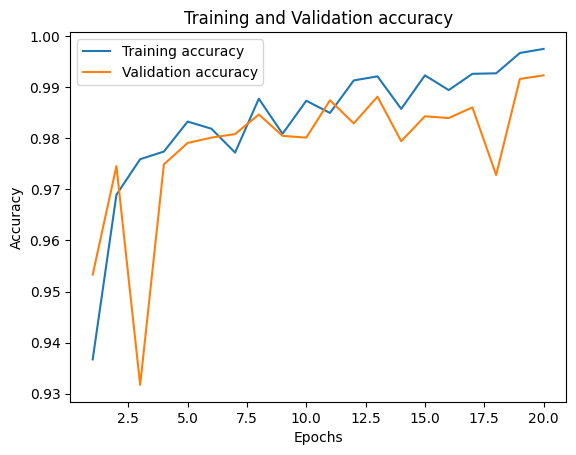

<Figure size 640x480 with 0 Axes>

In [25]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
val_f1_score = history.history["f1_score"]
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label = "Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

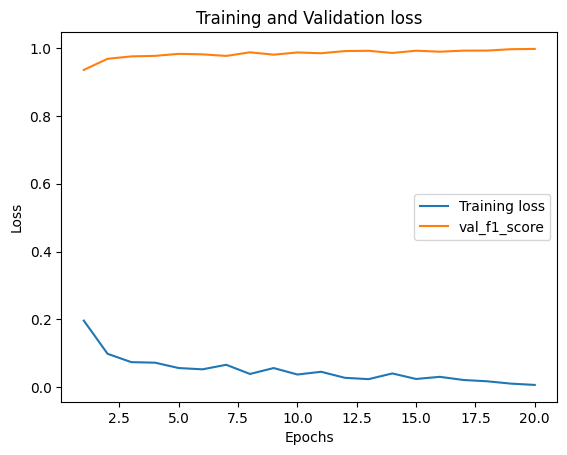

In [26]:
#Train and validation loss
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_f1_score, label='val_f1_score')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("/kaggle/working/model.densenet121.h5")

In [ ]:
results = model.evaluate(test_ds, steps=len(test_ds),verbose=1)

In [ ]:
y_pred = model.predict(test_ds,verbose)
y_pred = y_pred.flatten()
from sklearn.metrics import classification_report
target_names = ["close_look","forward_look","left_look","right_look"]
print(classification_report(y_true,y_pred,target_names=target_names,digits=4))

In [ ]:
from sklearn.metrics import confusion_matrix
report=classification_report(y_true, y_pred, target_names=target_names, digits=4)
isp = confusion_matrix(y_true, y_pred)
disp.astype('int')
pd.options.display.float_format = '{:.5f}'.format
df_cm = pd.DataFrame(disp, target_names, target_names)
# plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(4,4))
sn.set(font_scale=1.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15},ax=ax, cmap="YlOrBr" , fmt='g',cbar=False) # font size
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ioff()
plt.savefig("confusion_mat", bbox_inches='tight')
plt.show()
